In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\The World Bank Data\world_bank_dataset.csv")

In [3]:
df

,Country Name,Country Code,Series Name,Series Code,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1.451314661,2.260314203,2.647003203,1.189228129,3.911603416,-2.351100672,-20.73883937,-6.240171992,2.710886791
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,19134221645,18116572395,18753456498,18053222687,18799444490,19955929052,14259995441,14497243872,17233051620
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,565.5697304,522.0822156,525.4697709,491.3372214,496.6025043,510.7870634,356.4962141,357.2611528,415.7074171
3,Afghanistan,AFG,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,2967.692067,2958.785399,2952.998916,2902.392113,2927.245144,2769.685745,2144.16657,1981.710168,1992.424394
4,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,3.255800009,4.543970108,4.343190193,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,Zimbabwe,ZWE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,32.385,32.296,32.237,32.209,32.21,32.242,32.303,32.395,32.517
2840,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,1.339959276,1.388200293,1.442853821,1.487416378,1.563533516,1.659352809,1.726011143,1.706209286,1.677095914
2841,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,33.7,42.5,44,45.4,46.7,52.7,49,50.1,62
2842,Zimbabwe,ZWE,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,19.16017579,19.94353155,6.768516782,26.16397313,27.55415641,22.29306298,22.77524072,27.87217069,21.57940038


In [7]:
df_long=df.melt(id_vars=["Country Name","Country Code","Series Name","Series Code"], var_name="year",value_name="Value")
df_long

,Country Name,Country Code,Series Name,Series Code,year,Value
0,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2015,1.451314661
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2015,19134221645
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2015,565.5697304
3,Afghanistan,AFG,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,2015,2967.692067
4,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,2015,3.255800009
...,...,...,...,...,...,...
25591,Zimbabwe,ZWE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2023,32.517
25592,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,2023,1.677095914
25593,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,2023,62
25594,Zimbabwe,ZWE,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,2023,21.57940038


In [9]:
df_long["Value"]=pd.to_numeric(df_long["Value"], errors="coerce")

In [11]:
indicators= {'Country Name':"Country_Name",
                   'Country Code':"Country_Code",
                   'year':"Year",
     "Access to electricity (% of population)": "Electricity_access_pct",
    "Current health expenditure (% of GDP)": "Health_exp_GDP_pct",
    "Exports of goods and services (% of GDP)": "Exports_GDP_pct",
    "GDP (current US$)": "GDP_current",
    "GDP growth (annual %)": "GDP_growth_pct",
    "GDP per capita (current US$)": "GDP_pc_current",
    "GDP per capita, PPP (constant 2021 international $)": "GDP_pc_PPP",
    "Government expenditure on education, total (% of GDP)": "Edu_exp_GDP_pct",
    "Imports of goods and services (% of GDP)": "Imports_GDP_pct",
    "Life expectancy at birth, total (years)": "Life_expectancy",
    "Literacy rate, adult female (% of females ages 15 and above)": "Literacy_female_pct",
    "Literacy rate, adult total (% of people ages 15 and above)": "Literacy_total_pct",
    "Mortality rate, under-5 (per 1,000 live births)": "Mortality_u5",
    "Population growth (annual %)": "Pop_growth_pct",
    "Population, total": "Population_total",
    "School enrollment, primary (% gross)": "Enroll_primary_pct",
    "School enrollment, secondary (% gross)": "Enroll_secondary_pct",
    "Urban population (% of total population)": "Urban_pop_pct"
                  }
df_long["Series Name"]= df_long["Series Name"].map(indicators)

In [13]:
df_long

,Country Name,Country Code,Series Name,Series Code,year,Value
0,Afghanistan,AFG,GDP_growth_pct,NY.GDP.MKTP.KD.ZG,2015,1.451315e+00
1,Afghanistan,AFG,GDP_current,NY.GDP.MKTP.CD,2015,1.913422e+10
2,Afghanistan,AFG,GDP_pc_current,NY.GDP.PCAP.CD,2015,5.655697e+02
3,Afghanistan,AFG,GDP_pc_PPP,NY.GDP.PCAP.PP.KD,2015,2.967692e+03
4,Afghanistan,AFG,Edu_exp_GDP_pct,SE.XPD.TOTL.GD.ZS,2015,3.255800e+00
...,...,...,...,...,...,...
25591,Zimbabwe,ZWE,Urban_pop_pct,SP.URB.TOTL.IN.ZS,2023,3.251700e+01
25592,Zimbabwe,ZWE,Pop_growth_pct,SP.POP.GROW,2023,1.677096e+00
25593,Zimbabwe,ZWE,Electricity_access_pct,EG.ELC.ACCS.ZS,2023,6.200000e+01
25594,Zimbabwe,ZWE,Exports_GDP_pct,NE.EXP.GNFS.ZS,2023,2.157940e+01


In [15]:
df_long["Value"].isna().sum()

4399

In [17]:
df_long=df_long.rename(columns={"Country Name": "Country_Name", "Country Code": "Country_Code", "Series Name": "Series_Name", 
                                "Series Code":"Series_Code", "year": "Year"})

In [19]:
df_long

,Country_Name,Country_Code,Series_Name,Series_Code,Year,Value
0,Afghanistan,AFG,GDP_growth_pct,NY.GDP.MKTP.KD.ZG,2015,1.451315e+00
1,Afghanistan,AFG,GDP_current,NY.GDP.MKTP.CD,2015,1.913422e+10
2,Afghanistan,AFG,GDP_pc_current,NY.GDP.PCAP.CD,2015,5.655697e+02
3,Afghanistan,AFG,GDP_pc_PPP,NY.GDP.PCAP.PP.KD,2015,2.967692e+03
4,Afghanistan,AFG,Edu_exp_GDP_pct,SE.XPD.TOTL.GD.ZS,2015,3.255800e+00
...,...,...,...,...,...,...
25591,Zimbabwe,ZWE,Urban_pop_pct,SP.URB.TOTL.IN.ZS,2023,3.251700e+01
25592,Zimbabwe,ZWE,Pop_growth_pct,SP.POP.GROW,2023,1.677096e+00
25593,Zimbabwe,ZWE,Electricity_access_pct,EG.ELC.ACCS.ZS,2023,6.200000e+01
25594,Zimbabwe,ZWE,Exports_GDP_pct,NE.EXP.GNFS.ZS,2023,2.157940e+01


In [21]:
df=df_long.pivot_table(index=["Country_Name","Country_Code","Year"], columns="Series_Name", values="Value").reset_index()

In [23]:
df

Series_Name,Country_Name,Country_Code,Year,Edu_exp_GDP_pct,Electricity_access_pct,Enroll_primary_pct,Enroll_secondary_pct,Exports_GDP_pct,GDP_current,GDP_growth_pct,...,GDP_pc_current,Health_exp_GDP_pct,Imports_GDP_pct,Life_expectancy,Literacy_female_pct,Literacy_total_pct,Mortality_u5,Pop_growth_pct,Population_total,Urban_pop_pct
0,Afghanistan,AFG,2015,3.25580,71.5,106.182419,53.285141,NaN,1.913422e+10,1.451315,...,565.569730,10.105348,NaN,62.270,17.086241,33.753841,72.4,3.119959,33831764.0,24.803
1,Afghanistan,AFG,2016,4.54397,97.7,106.150284,53.506340,NaN,1.811657e+10,2.260314,...,522.082216,11.818590,NaN,62.646,NaN,NaN,70.0,2.535720,34700612.0,25.020
2,Afghanistan,AFG,2017,4.34319,97.7,106.129997,55.402149,NaN,1.875346e+10,2.647003,...,525.469771,12.620817,NaN,62.406,NaN,NaN,67.6,2.808337,35688935.0,25.250
3,Afghanistan,AFG,2018,NaN,93.4,107.780533,57.039299,NaN,1.805322e+10,1.189228,...,491.337221,14.208419,NaN,62.443,NaN,NaN,65.4,2.910810,36743039.0,25.495
4,Afghanistan,AFG,2019,NaN,97.7,110.007507,NaN,NaN,1.879944e+10,3.911603,...,496.602504,14.831320,NaN,62.941,NaN,NaN,63.3,2.984389,37856121.0,25.754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Zimbabwe,ZWE,2019,NaN,46.7,97.476614,NaN,27.554156,2.571741e+10,-6.332446,...,1684.027904,3.232678,28.241805,61.060,93.358124,93.227547,51.1,1.563534,15271368.0,32.210
1418,Zimbabwe,ZWE,2020,NaN,52.7,97.384162,NaN,22.293063,2.686794e+10,-7.816951,...,1730.413489,2.954401,25.020302,61.530,NaN,NaN,50.1,1.659353,15526888.0,32.242
1419,Zimbabwe,ZWE,2021,NaN,49.0,96.015148,NaN,22.775241,2.724052e+10,8.468017,...,1724.387731,2.785717,28.071888,60.135,NaN,NaN,47.6,1.726011,15797210.0,32.303
1420,Zimbabwe,ZWE,2022,NaN,50.1,95.789907,NaN,27.872171,3.278975e+10,6.139263,...,2040.552459,3.628807,36.891437,62.360,91.199997,89.849998,46.0,1.706209,16069056.0,32.395


In [25]:
df["Year"]=df["Year"].astype(int)

In [27]:

df["GDP_current_billion"] = df["GDP_current"] / 1_000_000_000
df["GDP_pc_PPP_thousand"] = df["GDP_pc_PPP"] / 1_000


In [29]:
df=df.round(4)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country_Name            1422 non-null   object 
 1   Country_Code            1422 non-null   object 
 2   Year                    1422 non-null   int32  
 3   Edu_exp_GDP_pct         1030 non-null   float64
 4   Electricity_access_pct  1413 non-null   float64
 5   Enroll_primary_pct      1100 non-null   float64
 6   Enroll_secondary_pct    949 non-null    float64
 7   Exports_GDP_pct         1224 non-null   float64
 8   GDP_current             1369 non-null   float64
 9   GDP_growth_pct          1361 non-null   float64
 10  GDP_pc_PPP              1326 non-null   float64
 11  GDP_pc_current          1374 non-null   float64
 12  Health_exp_GDP_pct      1204 non-null   float64
 13  Imports_GDP_pct         1224 non-null   float64
 14  Life_expectancy         1422 non-null   

# Handle ouliers

In [33]:
indicators=df.columns[3:]
indicators

Index(['Edu_exp_GDP_pct', 'Electricity_access_pct', 'Enroll_primary_pct',
       'Enroll_secondary_pct', 'Exports_GDP_pct', 'GDP_current',
       'GDP_growth_pct', 'GDP_pc_PPP', 'GDP_pc_current', 'Health_exp_GDP_pct',
       'Imports_GDP_pct', 'Life_expectancy', 'Literacy_female_pct',
       'Literacy_total_pct', 'Mortality_u5', 'Pop_growth_pct',
       'Population_total', 'Urban_pop_pct', 'GDP_current_billion',
       'GDP_pc_PPP_thousand'],
      dtype='object', name='Series_Name')

In [35]:
for i , predictors in enumerate(df[indicators]):
    print(f"{predictors} sknew is: ",df[predictors].skew())


Edu_exp_GDP_pct sknew is:  0.24481725124793138
Electricity_access_pct sknew is:  -1.7982458143225986
Enroll_primary_pct sknew is:  1.200735925871573
Enroll_secondary_pct sknew is:  -0.5532758372555993
Exports_GDP_pct sknew is:  2.1574505965897313
GDP_current sknew is:  8.069112740278237
GDP_growth_pct sknew is:  0.41141364133398833
GDP_pc_PPP sknew is:  1.4711252177456218
GDP_pc_current sknew is:  3.4182521089910884
Health_exp_GDP_pct sknew is:  0.9508276783406432
Imports_GDP_pct sknew is:  1.81856276956688
Life_expectancy sknew is:  -0.9679118719261779
Literacy_female_pct sknew is:  -1.2272031559788623
Literacy_total_pct sknew is:  -1.346065204565758
Mortality_u5 sknew is:  2.8862324516403834
Pop_growth_pct sknew is:  -0.5773204595624876
Population_total sknew is:  7.519028196052179
Urban_pop_pct sknew is:  -0.2393434817047987
GDP_current_billion sknew is:  8.069112740292057
GDP_pc_PPP_thousand sknew is:  1.471125117295063


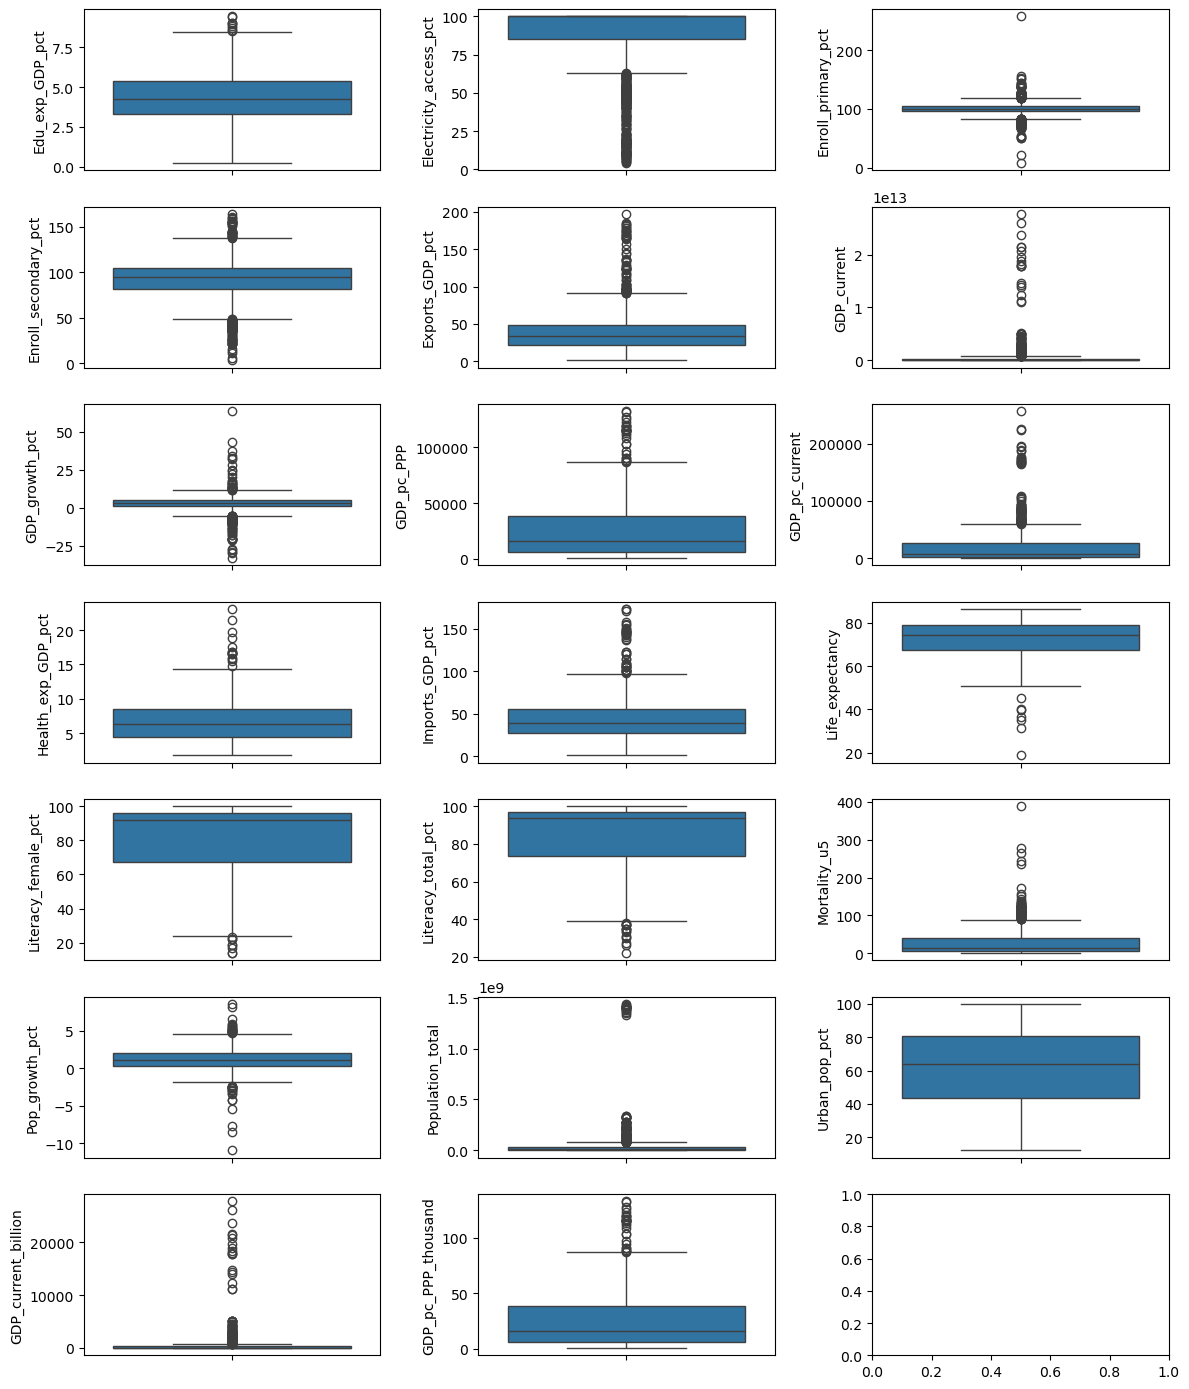

In [37]:
fig, axes=plt.subplots(7,3,figsize=(12,14))
axes=axes.ravel()
for i , predictors in enumerate(df[indicators]):
    sns.boxplot(df[predictors],ax=axes[i])
    plt.tight_layout()

### Data Transformation Using Yeo-Johnson

The World Bank dataset contains numeric indicators that are *skewed* and include *negative values and zeros*.  
To make the data more suitable for analysis and modeling, we apply the *Yeo-Johnson transformation*, which:

- Reduces skew in numeric features, bringing distributions closer to normal.  
- Can handle *negative and zero values*, unlike the log transformation.  
- Preserves all valid data points, including extreme values (outliers).  
- Helps improve the effectiveness of statistical analysis, correlation assessment, and predictive modeling.

We will apply this transformation only to *highly skewed numeric columns*, leaving moderately skewed columns unchanged.

In [46]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False) 
df[indicators] = pt.fit_transform(df[indicators])

In [48]:
for i , predictors in enumerate(df[indicators]):
    print(f"{predictors} sknew is: ",df[predictors].skew())

Edu_exp_GDP_pct sknew is:  0.014790818318031067
Electricity_access_pct sknew is:  -1.1593556931171467
Enroll_primary_pct sknew is:  0.7778406844025766
Enroll_secondary_pct sknew is:  -0.022938367776467464
Exports_GDP_pct sknew is:  0.02866838529889303
GDP_current sknew is:  -0.00830974965258269
GDP_growth_pct sknew is:  1.7430366257373424
GDP_pc_PPP sknew is:  -0.063723920140066
GDP_pc_current sknew is:  -0.03595757413435953
Health_exp_GDP_pct sknew is:  -0.02249014304489495
Imports_GDP_pct sknew is:  0.07165488448212153
Life_expectancy sknew is:  -0.12844984981630417
Literacy_female_pct sknew is:  -0.6881866124473106
Literacy_total_pct sknew is:  -0.6698951294085397
Mortality_u5 sknew is:  -0.05244482512534342
Pop_growth_pct sknew is:  0.11120518343324481
Population_total sknew is:  0.006947050616899622
Urban_pop_pct sknew is:  -0.17458603806660009
GDP_current_billion sknew is:  -0.08145943513251833
GDP_pc_PPP_thousand sknew is:  -0.09485350083422


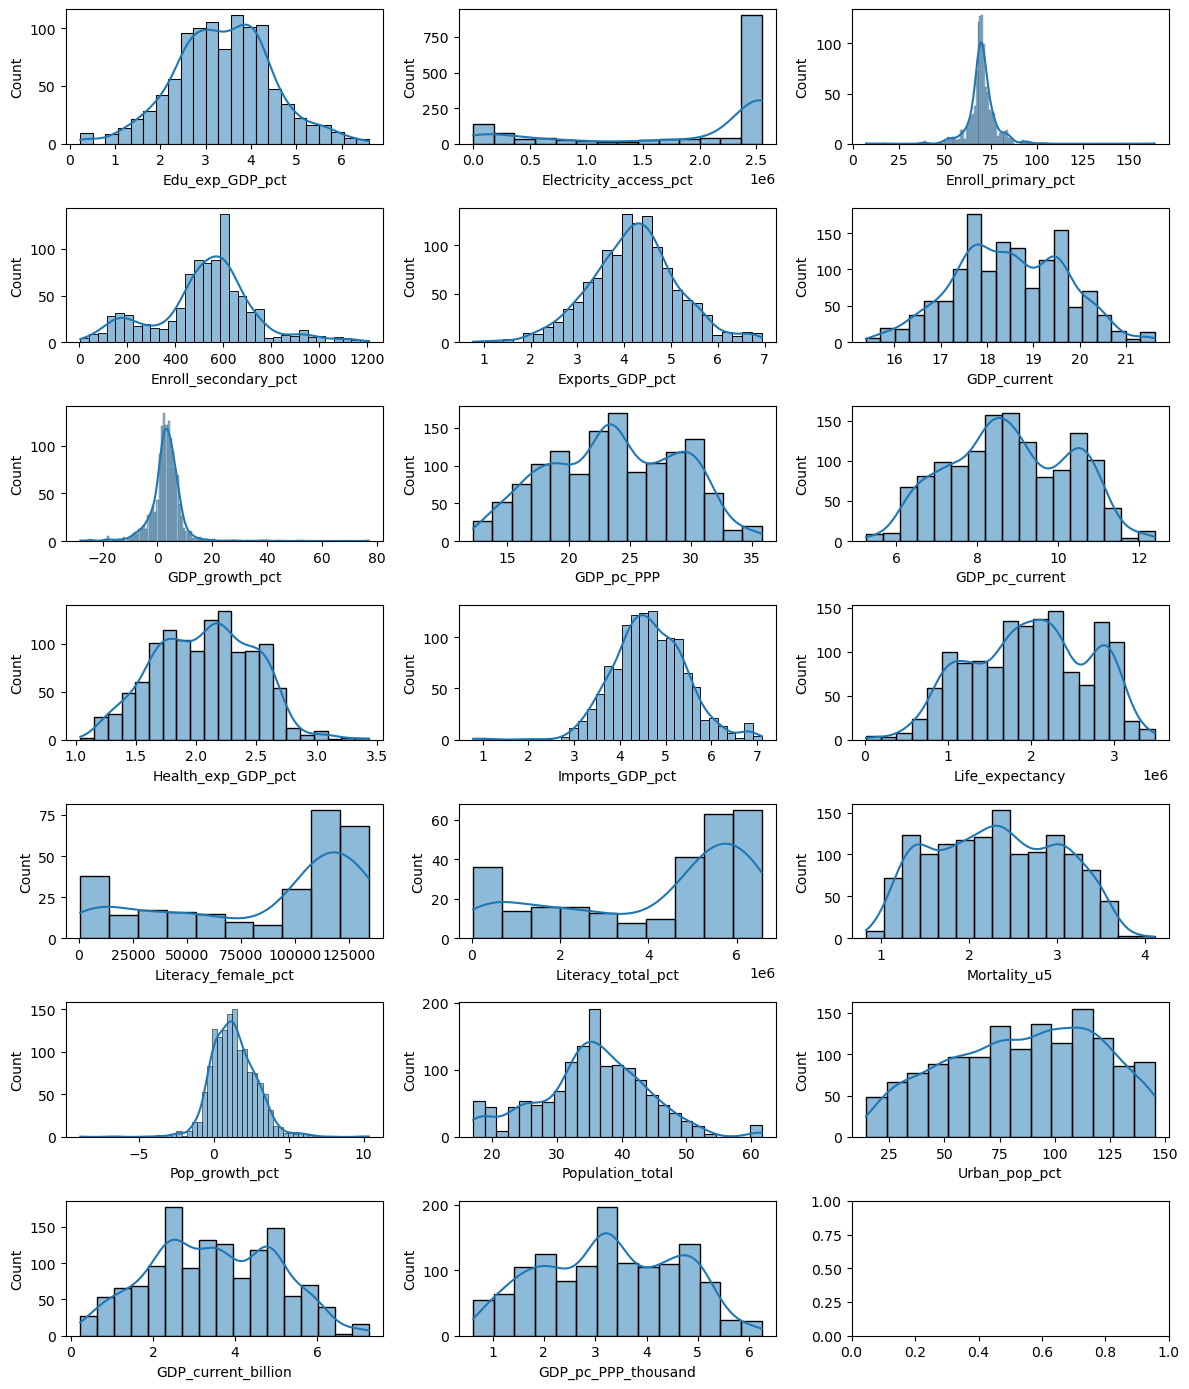

In [959]:
fig, axes=plt.subplots(7,3,figsize=(12,14))
axes=axes.ravel()
for i , predictors in enumerate(df[indicators]):
    sns.histplot(df[predictors],ax=axes[i], kde=True)
    plt.tight_layout()

### Values are now normally distributed to some extent

In [980]:
id_vars = ["Country_Name", "Country_Code", "Year"]
value_vars = [col for col in df.columns if col not in id_vars]

# Melt the dataframe
df_long = df.melt(id_vars=id_vars, value_vars=value_vars,
                  var_name="Indicator", value_name="Value")

In [982]:
df_long.to_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\The World Bank Data\the world Clean Dataset long.csv")

In [984]:
df.to_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\The World Bank Data\the world Clean Dataset.csv")

In [794]:
df=pd.read_csv(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\The World Bank Data\the world Clean Dataset.csv")

In [796]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1422 non-null   int64  
 1   Country_Name            1422 non-null   object 
 2   Country_Code            1422 non-null   object 
 3   Year                    1422 non-null   int64  
 4   Edu_exp_GDP_pct         1030 non-null   float64
 5   Electricity_access_pct  1413 non-null   float64
 6   Enroll_primary_pct      1100 non-null   float64
 7   Enroll_secondary_pct    949 non-null    float64
 8   Exports_GDP_pct         1224 non-null   float64
 9   GDP_growth_pct          1361 non-null   float64
 10  GDP_pc_current          1374 non-null   float64
 11  Health_exp_GDP_pct      1204 non-null   float64
 12  Imports_GDP_pct         1224 non-null   float64
 13  Life_expectancy         1422 non-null   float64
 14  Literacy_female_pct     294 non-null    

## % Of NUll Columns

In [986]:
pct_of_null=df.isna().sum()/len(df)*100

In [988]:
df.isna().sum()

Series_Name
Country_Name                 0
Country_Code                 0
Year                         0
Edu_exp_GDP_pct            392
Electricity_access_pct       9
Enroll_primary_pct         322
Enroll_secondary_pct       473
Exports_GDP_pct            198
GDP_current                 53
GDP_growth_pct              61
GDP_pc_PPP                  96
GDP_pc_current              48
Health_exp_GDP_pct         218
Imports_GDP_pct            198
Life_expectancy              0
Literacy_female_pct       1128
Literacy_total_pct        1140
Mortality_u5                54
Pop_growth_pct               0
Population_total             0
Urban_pop_pct                9
GDP_current_billion         53
GDP_pc_PPP_thousand         96
dtype: int64

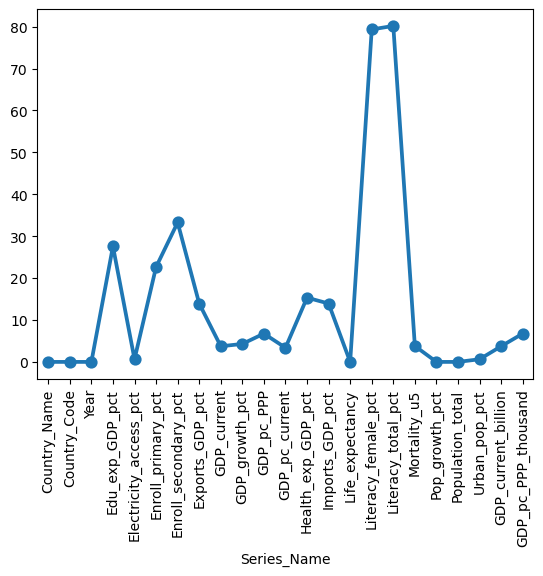

In [990]:
sns.pointplot(pct_of_null)
plt.xticks(rotation=90);

### How have indicators changed over time for each country?

In [1002]:
def country(country):
 specific_country=df[df["Country_Name"]==country]
 indicators=specific_country.columns[3:]
 fig, axes= plt.subplots(7,3, figsize=(12,18))
 axes=axes.ravel()
 for i, predictor in enumerate(indicators):
    sns.lineplot(data=specific_country, x="Year",y=predictor, ax=axes[i])
    axes[i].set_title(f"{predictor} change over time")
    axes[i].tick_params(axis='x', rotation=90)
     
 fig.suptitle(f"Trends of Indicators Over Years for {country}")
 plt.tight_layout(rect=[0, 0, 1, 0.98])

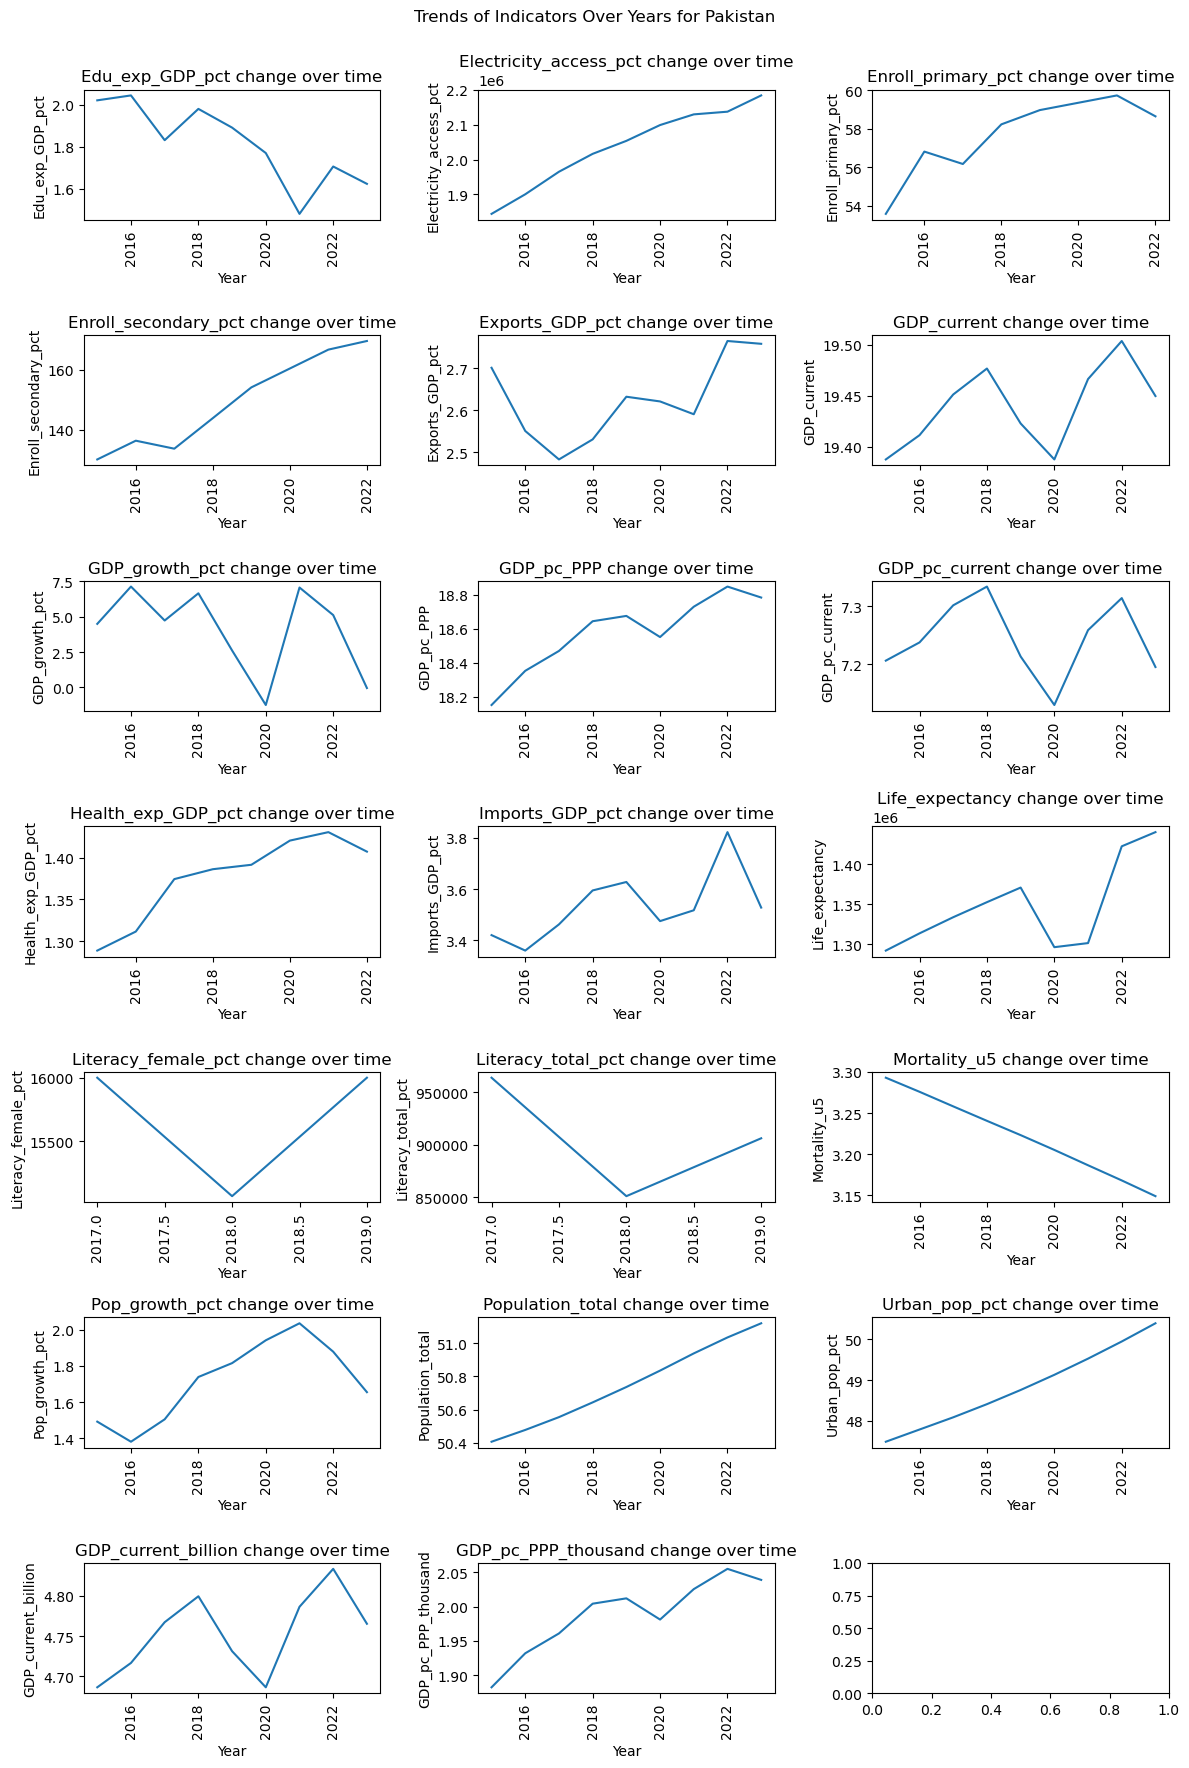

In [1004]:
country("Pakistan")




#### Which years show major spikes or drops in GDP, population, or other indicators?


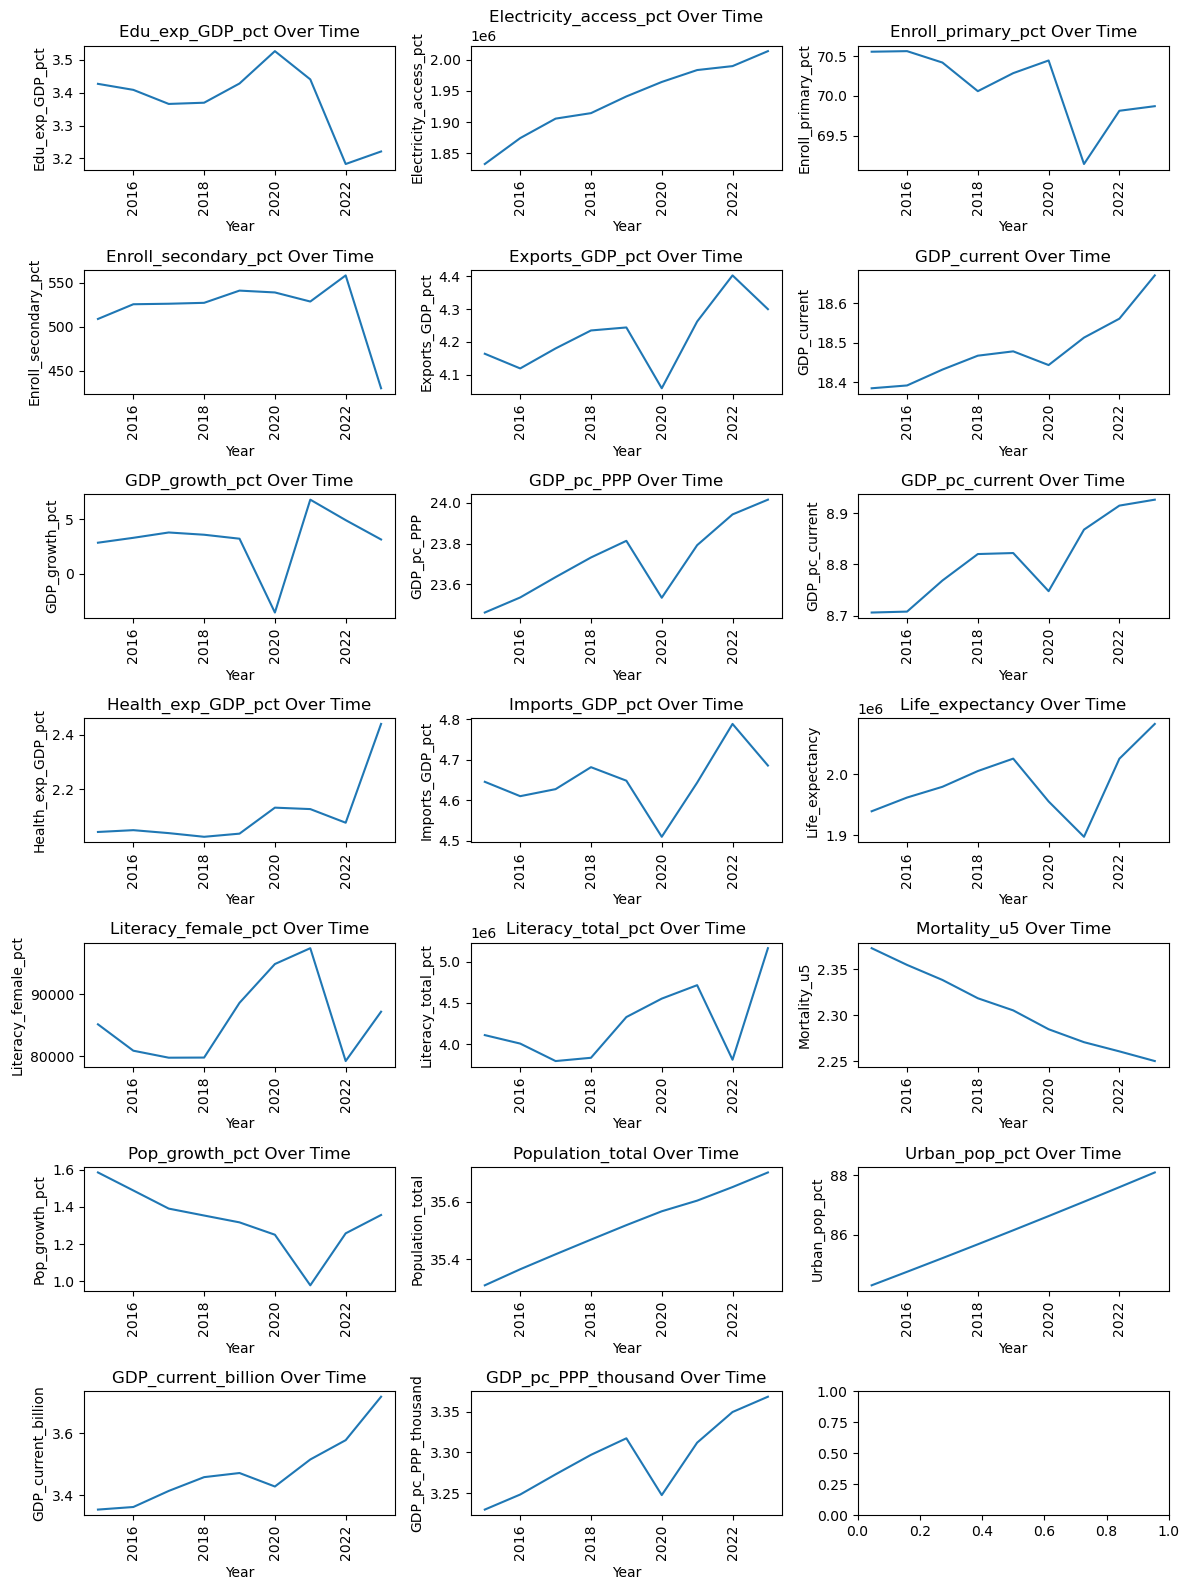

In [1006]:
fig, axes= plt.subplots(7,3, figsize=(12,16))
axes=axes.ravel()
indicators=df.columns[3:]
for i, predicor in enumerate(df[indicators]):
 sns.lineplot(data=df, x="Year", y=predicor, errorbar=None, ax=axes[i])
 axes[i].set_title(f"{predicor} Over Time")
 axes[i].tick_params(axis='x', rotation=90)
 plt.tight_layout()
    

#### Are there any missing values trends across years or countries?

In [1008]:
df[df.isna().any(axis=1)]

Series_Name,Country_Name,Country_Code,Year,Edu_exp_GDP_pct,Electricity_access_pct,Enroll_primary_pct,Enroll_secondary_pct,Exports_GDP_pct,GDP_current,GDP_growth_pct,...,Imports_GDP_pct,Life_expectancy,Literacy_female_pct,Literacy_total_pct,Mortality_u5,Pop_growth_pct,Population_total,Urban_pop_pct,GDP_current_billion,GDP_pc_PPP_thousand
0,Afghanistan,AFG,2015,2.659,8.078e+05,73.56,236.1,NaN,17.91,1.497,...,NaN,1.069e+06,1.125e+03,1.29e+05,3.269,3.472,41.05,31.61,2.702,1.473
1,Afghanistan,AFG,2016,3.552,2.353e+06,73.54,237.5,NaN,17.88,2.359,...,NaN,1.092e+06,NaN,NaN,3.25,2.784,41.17,31.91,2.66,1.471
2,Afghanistan,AFG,2017,3.416,2.353e+06,73.53,249.7,NaN,17.9,2.776,...,NaN,1.077e+06,NaN,NaN,3.231,3.104,41.3,32.23,2.687,1.469
3,Afghanistan,AFG,2018,NaN,2.016e+06,74.56,260.4,NaN,17.88,1.222,...,NaN,1.079e+06,NaN,NaN,3.212,3.224,41.44,32.57,2.658,1.454
4,Afghanistan,AFG,2019,NaN,2.353e+06,75.96,NaN,NaN,17.9,4.157,...,NaN,1.111e+06,NaN,NaN,3.194,3.311,41.57,32.94,2.689,1.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Zimbabwe,ZWE,2019,NaN,1.893e+05,68.08,NaN,3.97,18.07,-5.853,...,4.145,9.957e+05,1.11e+05,5.085e+06,3.071,1.671,37.5,42.03,2.928,1.564
1418,Zimbabwe,ZWE,2020,NaN,2.854e+05,68.02,NaN,3.69,18.1,-7.162,...,3.972,1.024e+06,NaN,NaN,3.06,1.779,37.57,42.07,2.961,1.479
1419,Zimbabwe,ZWE,2021,NaN,2.229e+05,67.15,NaN,3.717,18.1,9.287,...,4.136,9.424e+05,NaN,NaN,3.03,1.854,37.64,42.16,2.972,1.534
1420,Zimbabwe,ZWE,2022,NaN,2.403e+05,67.01,NaN,3.985,18.21,6.64,...,4.536,1.074e+06,1.041e+05,4.445e+06,3.01,1.832,37.72,42.29,3.112,1.572


# 🏥 Health & Demographic


<Axes: xlabel='Year', ylabel='Life_expectancy'>

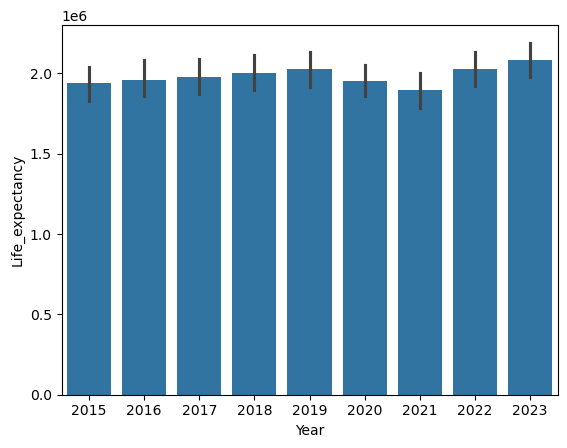

In [1010]:
#How has life expectancy changed over time?
sns.barplot(data=df, x="Year", y="Life_expectancy")

<Axes: xlabel='Mortality_u5', ylabel='Life_expectancy'>

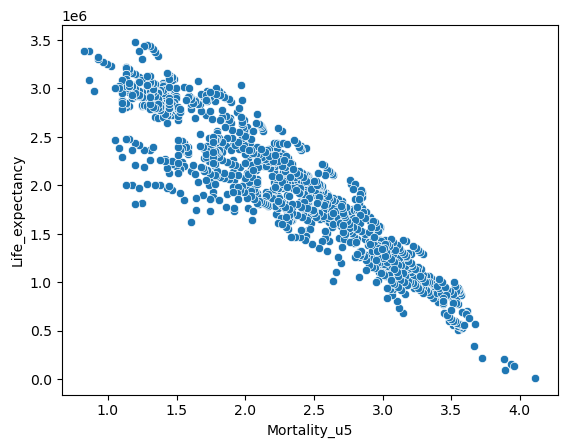

In [1012]:
#Is there a relationship between mortality under 5 and life expectancy?
sns.scatterplot(data=df, x="Mortality_u5", y="Life_expectancy")

<Axes: xlabel='Series_Name', ylabel='Series_Name'>

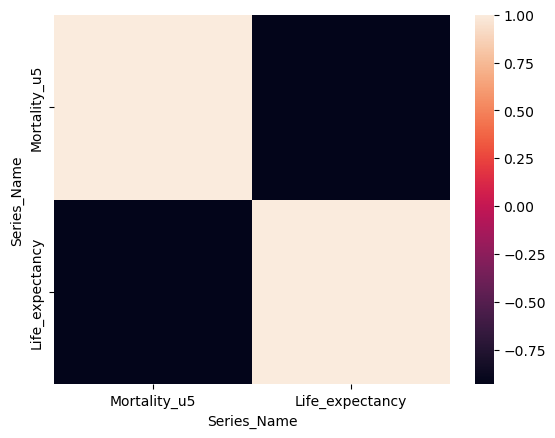

In [1014]:
lifeRxpansMortalityRate=df[["Mortality_u5","Life_expectancy"]].corr()
sns.heatmap(data=lifeRxpansMortalityRate)

 - There is Negative correlation between life expectancy and mortality under 5 when mortality rate deceases life expectency increases and vise versa

<Axes: xlabel='Series_Name', ylabel='Series_Name'>

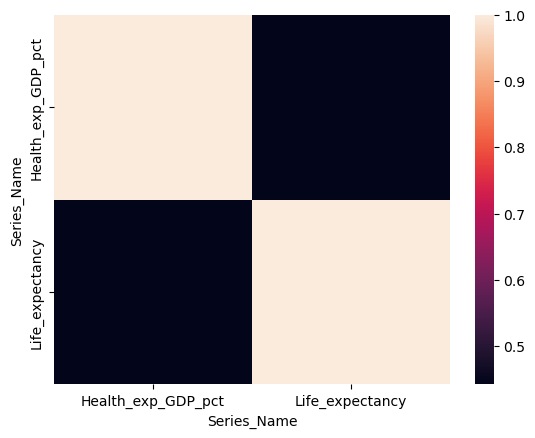

In [1016]:
# Does higher health expenditure % of GDP lead to longer life expectancy?
corr=df[["Health_exp_GDP_pct","Life_expectancy"]].corr()
sns.heatmap(data=corr)

- There is a moderate positive relationship → countries that spend more (as % of GDP) on health generally tend to have higher life expectancy.

In [1028]:
# Which countries show the steepest decline in mortality_u5?
first_last=df[["Country_Name","Year","Mortality_u5"]].groupby("Country_Name")["Mortality_u5"].agg(First_year="first", last_year="last")

In [1030]:
first_last["Difference"]=first_last["First_year"]-first_last["last_year"]

In [1034]:
first_last=first_last.reset_index()

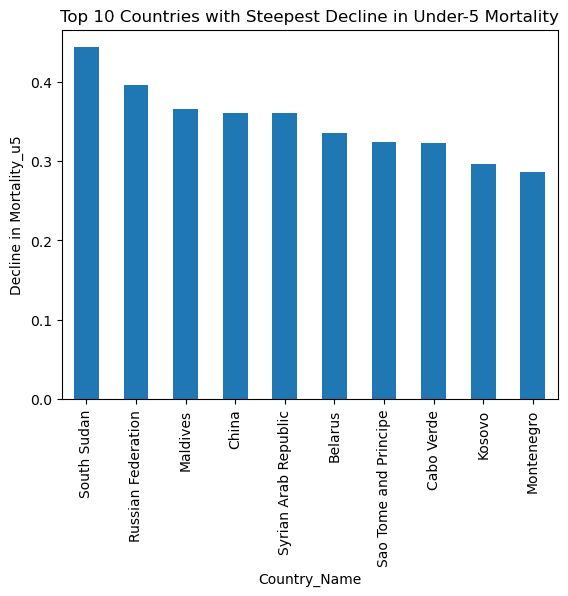

In [1036]:
first_last[["Country_Name","Difference"]].sort_values("Difference", ascending=False).head(10).plot(kind="bar", x="Country_Name", y="Difference")
plt.title("Top 10 Countries with Steepest Decline in Under-5 Mortality")
plt.ylabel("Decline in Mortality_u5")
plt.legend([],[],frameon=False);

- These are top 10 cuntries that had steeped decline in mortality under 5

<Axes: xlabel='Year', ylabel='Pop_growth_pct'>

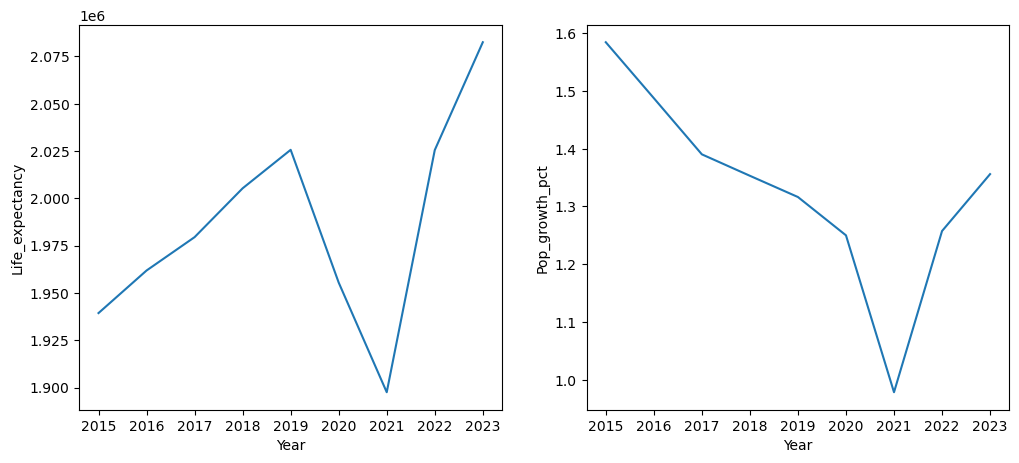

In [1038]:
# Compare population growth (%) vs life expectancy trends.
fig, axes=plt.subplots(1,2,figsize=(12,5))
df[["Life_expectancy","Pop_growth_pct"]]
sns.lineplot(df, x="Year", y="Life_expectancy", ax=axes[0], errorbar=None)
sns.lineplot(df, x="Year", y="Pop_growth_pct",  ax=axes[1],  errorbar=None)

- Life expectancy generally increased but showed a sharp dip in 2020–2021, which could be linked to the COVID-19 pandemic.
- Population growth % steadily declined, reaching its lowest in 2021, which could also be related to pandemic effects.

# 💰 Economic Indicators

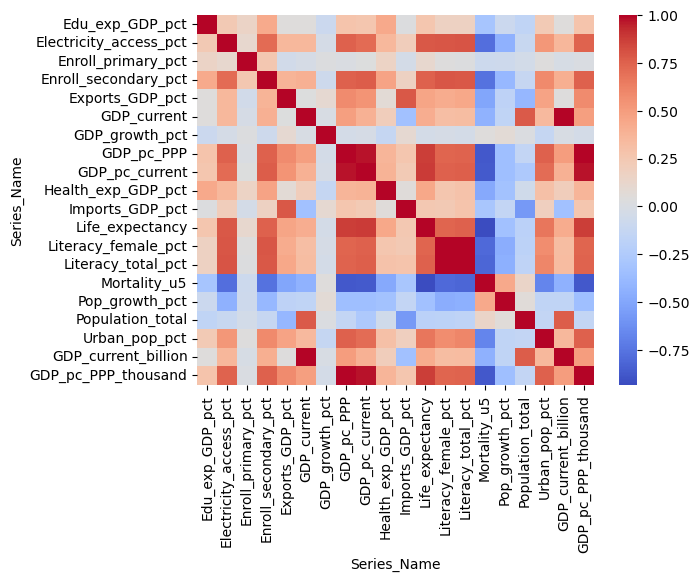

<Figure size 2000x1500 with 0 Axes>

In [1040]:
# What is the trend of GDP_current and GDP_pc_current over time by country?
corr=df.iloc[:, 3:].corr()
threshhold=0.4
sns.heatmap(data=corr, cmap="coolwarm")
plt.figure(figsize=(20,15));

In [1042]:
corr.index.name=None
corr.columns.name=None
corr_pair=corr.stack().reset_index()
corr_pair.columns=(["Indicator 1", "Indicator 2","Correlation"])
threshhold=0.55
corr_pair=corr_pair[((corr_pair["Correlation"]>threshhold) | (corr_pair["Correlation"]<-threshhold)) & 
(corr_pair["Indicator 1"]!=corr_pair["Indicator 2"])]

In [1044]:
corr_pair

,Indicator 1,Indicator 2,Correlation
23,Electricity_access_pct,Enroll_secondary_pct,0.7151
27,Electricity_access_pct,GDP_pc_PPP,0.753
28,Electricity_access_pct,GDP_pc_current,0.7149
31,Electricity_access_pct,Life_expectancy,0.782
32,Electricity_access_pct,Literacy_female_pct,0.7961
...,...,...,...
391,GDP_pc_PPP_thousand,Life_expectancy,0.8777
392,GDP_pc_PPP_thousand,Literacy_female_pct,0.737
393,GDP_pc_PPP_thousand,Literacy_total_pct,0.75
394,GDP_pc_PPP_thousand,Mortality_u5,-0.8791


- I set my threshhold 0.55 all above indicators are either positively correlated or negatively correlated

### Expected Relationships
- Imports and exports rise together — countries active in trade usually do both.
- GDP per capita (PPP and current) show a very strong link, as they measure similar aspects of income.
### Development Insights
- Higher electricity access is strongly linked to lower child mortality.
- Life expectancy improves as child mortality decreases.
- Female literacy and secondary school enrollment go hand in hand, showing the role of education policies in gender equality.
### 🔹 Surprising Patterns
- Life expectancy rises with urbanization, suggesting cities provide better healthcare and services.
- Electricity access is connected to literacy, showing infrastructure supports education.
- Larger populations still show a positive link with GDP, highlighting scale effects in economies.

## Lets See how Correlation has been for a specific Country

In [1047]:
def country(country):
    corr = df[df["Country_Name"] == country]
    corr = corr.iloc[:, 3:].corr()
    corr.index.name = None
    corr.columns.name = None
    corr_pair = corr.stack().reset_index()
    corr_pair.columns = ["Indicator 1", "Indicator 2", "Correlation"]
    
    threshhold = 0.7
    corr_pair = corr_pair[
        ((corr_pair["Correlation"] > threshhold) | (corr_pair["Correlation"] < -threshhold)) &
        (corr_pair["Indicator 1"] != corr_pair["Indicator 2"])
    ]
    
    return corr_pair


In [1049]:
pak_corr = country("Pakistan")
pak_corr

,Indicator 1,Indicator 2,Correlation
1,Edu_exp_GDP_pct,Electricity_access_pct,-0.8392
3,Edu_exp_GDP_pct,Enroll_secondary_pct,-0.796
7,Edu_exp_GDP_pct,GDP_pc_PPP,-0.7098
9,Edu_exp_GDP_pct,Health_exp_GDP_pct,-0.8004
12,Edu_exp_GDP_pct,Literacy_female_pct,-0.9169
...,...,...,...
393,GDP_pc_PPP_thousand,Literacy_total_pct,-0.7948
394,GDP_pc_PPP_thousand,Mortality_u5,-0.9065
396,GDP_pc_PPP_thousand,Population_total,0.8954
397,GDP_pc_PPP_thousand,Urban_pop_pct,0.8893


In [1051]:
def indicator(indicator):
    # Compute mean per country
    top10 = df.groupby("Country_Name")[indicator].mean().reset_index()
    
    # Get top 10 highest and lowest
    top10Highest = top10.sort_values(indicator, ascending=False).head(10)
    top10Lowest = top10.sort_values(indicator, ascending=True).head(10)

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.barplot(data=top10Highest, x="Country_Name", y=indicator, ax=axes[0])
    sns.barplot(data=top10Lowest, x="Country_Name", y=indicator, ax=axes[1])
    
    axes[0].set_title(f"Top 10 Countries by highest {indicator}")
    axes[1].set_title(f"Top 10 Countries by lowest {indicator}")
    plt.tight_layout()
    axes[0].tick_params(axis="x", rotation=90)
    axes[1].tick_params(axis="x", rotation=90)


In [1053]:
df.columns

Index(['Country_Name', 'Country_Code', 'Year', 'Edu_exp_GDP_pct',
       'Electricity_access_pct', 'Enroll_primary_pct', 'Enroll_secondary_pct',
       'Exports_GDP_pct', 'GDP_current', 'GDP_growth_pct', 'GDP_pc_PPP',
       'GDP_pc_current', 'Health_exp_GDP_pct', 'Imports_GDP_pct',
       'Life_expectancy', 'Literacy_female_pct', 'Literacy_total_pct',
       'Mortality_u5', 'Pop_growth_pct', 'Population_total', 'Urban_pop_pct',
       'GDP_current_billion', 'GDP_pc_PPP_thousand'],
      dtype='object', name='Series_Name')

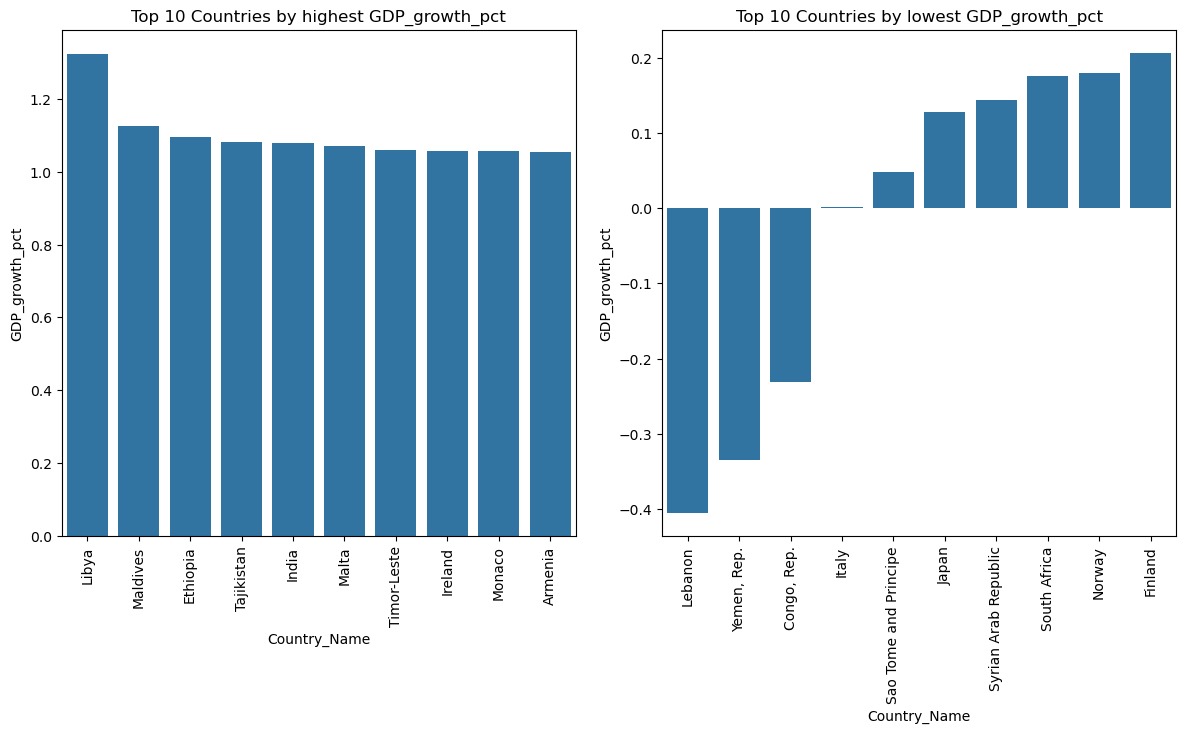

In [714]:
indicator("GDP_growth_pct")